In [ ]:
import numpy as np #here we are importing the constants and system we need to run our calculations and make them easier
import astropy.units as u
import astropy.constants as ac
import matplotlib.pyplot as plt

In [ ]:
from google.colab import files #this code and the code below are importing a specific data file for us to base our program off of

In [ ]:
upload = files.upload()

Saving galaxy_rotation_2006.txt to galaxy_rotation_2006.txt


In [ ]:
import astropy.io.ascii #Here we are importing another program to help with our calculations

In [ ]:
tab = astropy.io.ascii.read("galaxy_rotation_2006.txt") #The code is now reading the file we uploaded earlier

(0.0, 300.0)

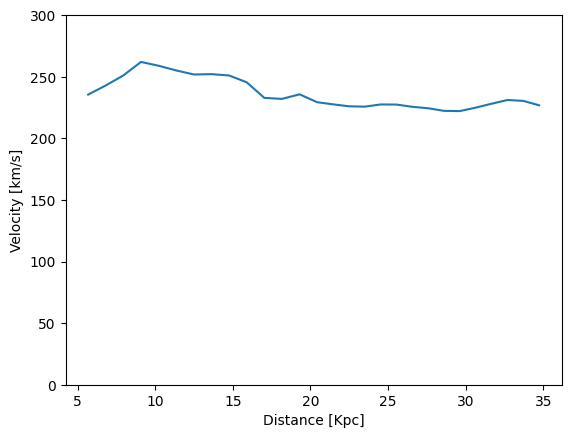

In [ ]:
dis = tab["col2"] #Here, we set distance equal to the values in column 2, velocity to column 3
vel = tab["col3"]
plt.plot(dis, vel)
plt.xlabel("Distance [Kpc]") # Taken the values above, we plot them as functions of distance and velocity over each other
plt.ylabel("Velocity [km/s]")
plt.ylim(0, 300)

In [ ]:
print(dis) #Here is the printed value for distance

 col2
-----
 5.68
 6.81
 7.95
 9.08
10.22
11.35
12.49
13.62
14.76
15.89
  ...
24.52
25.54
26.56
27.58
 28.6
29.62
30.65
31.67
32.69
33.71
34.73
Length = 28 rows


In [ ]:
def calculate_orbital_velocity(mass, radius):
  return(np.sqrt(ac.G * mass / radius))

In [ ]:
mass = 1 * u.earthMass #we are basically switching the variables for mass and radius here, in terms of Earth
radius = 1 * u.earthRad
orb_vel = calculate_orbital_velocity(mass, radius)
print(orb_vel.to(u.km / u.s))

7.905388234385281 km / s


In [ ]:
mass = 3e7 * u.solMass #We are doing the same thing here but with solar constants to find the solar velocity
radius = 5.68 * 1000 * u.parsec
calculate_orbital_velocity(mass, radius)
print(orb_vel.to(u.km / u.s))

7.905388234385281 km / s


In [ ]:
vel_bh = np.zeros(np.shape(dis)) * u.km / u.s # here we are creating a program that defines both orbital velocity and kpc for the values we calculated above

for i, radius in enumerate(dis):
  rad = radius * 1000 *u.parsec
  orb_vel = calculate_orbital_velocity(mass, rad)
  vel_bh[i] = orb_vel
  print("The orbital velocity at ", radius, "kpc =", orb_vel.to(u.km / u.s))

The orbital velocity at  5.68 kpc = 4.766142291386287 km / s
The orbital velocity at  6.81 kpc = 4.352789004155528 km / s
The orbital velocity at  7.95 kpc = 4.028632086788635 km / s
The orbital velocity at  9.08 kpc = 3.7696258549122557 km / s
The orbital velocity at  10.22 kpc = 3.5531678501224344 km / s
The orbital velocity at  11.35 kpc = 3.3716558645298256 km / s
The orbital velocity at  12.49 kpc = 3.214104201911268 km / s
The orbital velocity at  13.62 kpc = 3.077886621912613 km / s
The orbital velocity at  14.76 kpc = 2.956636901678396 km / s
The orbital velocity at  15.89 kpc = 2.8495692993877366 km / s
The orbital velocity at  17.03 kpc = 2.7525413240352865 km / s
The orbital velocity at  18.16 kpc = 2.6655280045445924 km / s
The orbital velocity at  19.3 kpc = 2.585607014258112 km / s
The orbital velocity at  20.43 kpc = 2.513083903274837 km / s
The orbital velocity at  21.45 kpc = 2.4526045154369367 km / s
The orbital velocity at  22.47 kpc = 2.396291435442096 km / s
The or

(0.0, 300.0)

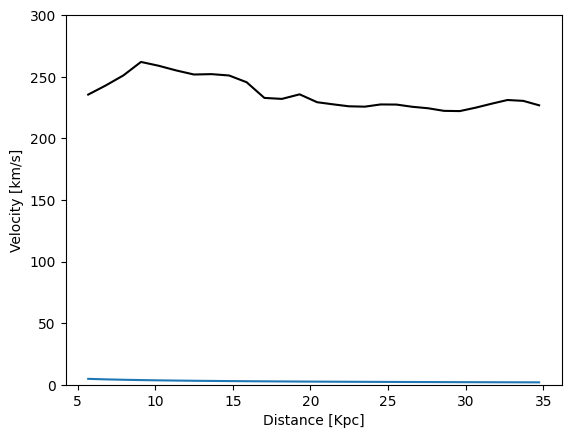

In [ ]:
dis = tab["col2"] # Here we are laying out in a plot again but with our new vales comparing black holes to the known universe
vel = tab["col3"]
plt.plot(dis, vel, color = "black", label = "data")
plt.plot(dis, vel_bh.value)
plt.xlabel("Distance [Kpc]")
plt.ylabel("Velocity [km/s]")
plt.ylim(0, 300)